# Table of Contents


<b><li>Introduction</li>
<li>Questions</li>
<li>Gapminder Data Load</li>
<li>Data Wrangling</li>
<li>Exploratory Data Analysis</li>
<li>Conclusions</li>
<li>Used Ressources</li></b>

# Introduction
My motivation for choosing the Gapminder (https://www.gapminder.org/data/) dataset was to get on overview over key indicators, you often hear about in the news, and calculate the statistics on my own. The growth of the population worldwide, the increased life expectancy, the income per person and the gini coefficient, a key indicator for income inequality, were the datasets of my choice. I also wanted to get an overview about the differences in the regions of the world. I used the continents as geographical brackets over the countries. This approach is not 100% accurate, because there are countries, that belong to Europe and Asia. On the other hand continents are a common geographical category and I think for my kind of project accurate enough.
Her is a short description from the Gapminder webpage for these datsets:

- <b>'population_total.csv'</b>: Total population
- <b>'life_expectancy_years.csv'</b>: the average number a newborn child would live if current mortality patterns would stay the same
- <b>'income_per_person_gdppercapita_ppp_inflation_adjusted.csv'</b>: Gross domestic product adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP)
- <b>'gini.csv'</b>: Gini shows income inequality in a society. A higher number means more inequality.

# Questions

- How has the population, life expectancy, income and gini on world level and in the different Continents (Asia, Europe, Northamerica, Southamerica, Africa and Ozeania) developed over time?

- How does the life expectancy correlates with the other indicators? 

- How does the correlation of these key indicators with a continental view look like?

# Gapminder Data Load
## Importing the necessary Python modules

In [1]:
# Import statements for all of the packages used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os

## Importing and storing the datasets

In [2]:
# overview over data downloaded from gapminder webpage
data_csv = glob.glob('*.csv')
print('The following datasets were downloaded: ',data_csv)

The following datasets were downloaded:  ['income_per_person_gdppercapita_ppp_inflation_adjusted.csv', 'df_all_conti_mean.csv', 'gini.csv', 'life_expectancy_years.csv', 'population_total.csv']


In [3]:
# put all dataframes into a dictionary, take the country column as index and machine readable renaming all countries
d = {}
for i in data_csv:
    i_ = i.replace('.csv','')
    d[i_] = pd.read_csv(i, index_col=0)
    d[i_].rename(index=lambda y: y.strip().lower().replace(" ", "_").replace(".", ""), inplace=True)

In [4]:
# show the keys of the dictionary d
list(d.keys())

['income_per_person_gdppercapita_ppp_inflation_adjusted',
 'df_all_conti_mean',
 'gini',
 'life_expectancy_years',
 'population_total']

# Data Wrangling
## General Properties of Data

In [5]:
# function to call the data statistics in a human readable format
def data_stats(df):
    df_dupl = 'There are {} duplicates in the dataframe'.format(df.duplicated().sum())
    nandf_count = 'There are {} Nan Values in the dataframe'.format(sum(df.isnull().sum().tolist()))
    mean_startend = 'Countries in average start in {} with {} and end with {} in {}'.format(df.columns[0],df[df.columns[0]].mean(), df[df.columns[-1]].mean(), df.columns[-1])
    first_year = 'The first year is {} with a min value {}, a 25% quantile {}, a 50% quantile {}, a 75% quantile {} and a max value {}. The standard deviation is {}.'.format(df.columns[0], df[df.columns[0]].min(),df[df.columns[0]].quantile(0.25,'linear'), df[df.columns[0]].quantile(0.5,'linear'), df[df.columns[0]].quantile(0.75,'linear'), df[df.columns[0]].max(), df[df.columns[0]].std())
    last_year = 'The last year is {} with a min value {}, a 25% quantile {}, a 50% quantile {}, a 75% quantile {} and a max value {}. The standard deviation is {}.'.format(df.columns[-1], df[df.columns[-1]].min(),df[df.columns[-1]].quantile(0.25,'linear'), df[df.columns[-1]].quantile(0.5,'linear'), df[df.columns[-1]].quantile(0.75,'linear'), df[df.columns[-1]].max(), df[df.columns[-1]].std())
    col_diff = int(df.columns[-1])-int(df.columns[0])
    min_diff = df[df.columns[-1]].min()-df[df.columns[0]].min()
    quant_25_diff = df[df.columns[-1]].quantile(0.25,'linear')-df[df.columns[0]].quantile(0.25,'linear')
    quant_50_diff = df[df.columns[-1]].quantile(0.5,'linear')-df[df.columns[0]].quantile(0.5,'linear')
    quant_75_diff = df[df.columns[-1]].quantile(0.75,'linear')-df[df.columns[0]].quantile(0.75,'linear')    
    max_diff = df[df.columns[-1]].max()-df[df.columns[0]].max()
    std_diff = df[df.columns[-1]].std()-df[df.columns[0]].std()
    difference_years = 'The difference between the first and the last year is {} with a min value {}, a 25% quantile {}, a 50% quantile {}, a 75% quantile {} and a max value {}. The standard deviation is {}.'.format(col_diff, min_diff,quant_25_diff,quant_50_diff,quant_75_diff, max_diff, std_diff)
    sen_min = 'The min value of the mean is {} in the year {}'.format(df.mean().min(), df.mean().idxmin(axis=1))
    sen_max = 'The max value of the mean is {} in the year {}'.format(df.mean().max(), df.mean().idxmax(axis=1))
    sen_diff = 'The difference is {}'.format(df.mean().max()- df.mean().min())
    sen_shape = 'There are {} countries'.format(df.shape[0])
    return print(df.info(),'\n','- ',  df_dupl,'\n','- ',  nandf_count,'\n','- ',  mean_startend,'\n','- ',  first_year,'\n','- ',  last_year,'\n','- ', difference_years,'\n', '- ', sen_shape,'\n', '- ', sen_min,'\n', '- ', sen_max,'\n', '- ', sen_diff,'\n')

In [6]:
#function that generates data visualisations
def data_check(k):
    #for i in w:
    df = d[k]
    df_mean = df.mean()
    years = df.columns
    years = years.astype(int)
    plot_chart = plt.plot(years, df_mean, label = 'mean of all countries', linewidth = 3)
    plot_title = k + ' over' +' time'
    plt.title(plot_title)
    plt.xlabel('years')
    plt.ylabel(k)
    plt.legend(fontsize=12, title_fontsize=15)
    plt.rcParams['figure.figsize'] = [10, 10]
    return plot_chart#, data_stats(df)

### Population Data

#### Total population

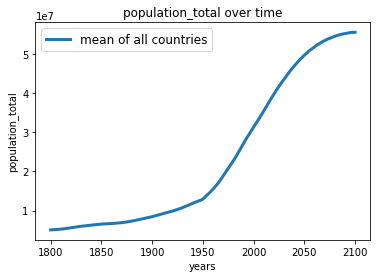

In [7]:
data_check('population_total')

#### Summary population total:

- The differences betweeen the sizes of population are getting bigger, because of an increasing standard deviaton
- Almost all values are growing over time, only the min value decreased over time
- After 1950 the population worldwide grew faster
- The standard deviation increased over time, the differences between the countries regarding the size of the population are getting bigger.

### Life expectancy data

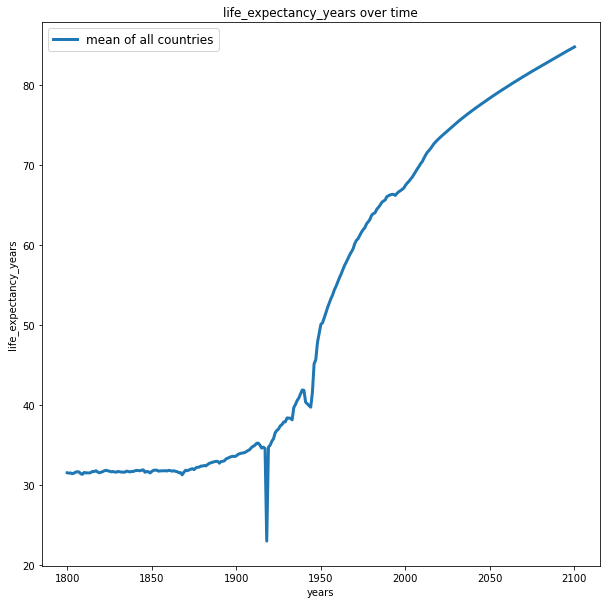

In [8]:
data_check('life_expectancy_years')

#### Summary Life expectancy:

- There is a extreme low in the curves (assumption: decrease of life expectancy due to war or pandemic)
- All values are growing over time, besides two lows
- As the population_total curve this curve seems to grow faster after 1950
- The NaN values have to be checked
- The standard deviation increased over time, the differences in the life expectancy are getting bigger.

In [9]:
# dropping the rows with nan values
nan_ley = sum(d['life_expectancy_years'].isna().any(axis=1))
print(nan_ley)
d['life_expectancy_years'] = d['life_expectancy_years'].dropna()

3


### Income Data

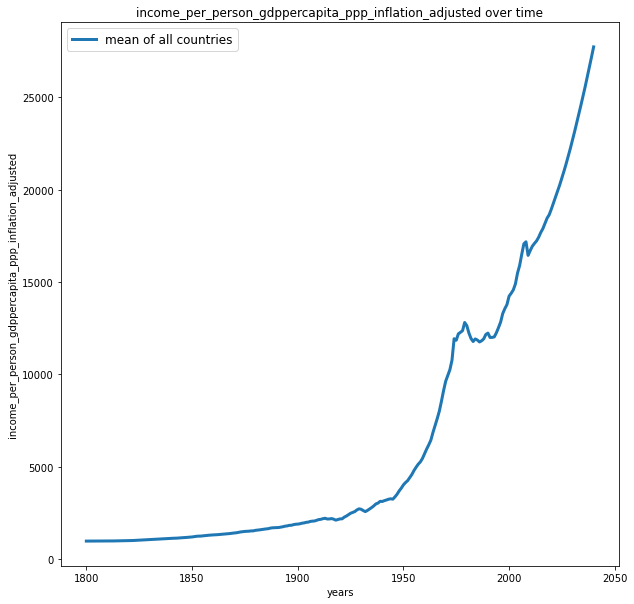

In [10]:
data_check('income_per_person_gdppercapita_ppp_inflation_adjusted')

#### Summary Income Data:
- All values are growing over time
- The curve is almost constantly rising and after 1950 it seems to grow faster. This growth stops in the decade(s) before 2000 and than starts to grow again with a smal interruption

### Gini Data

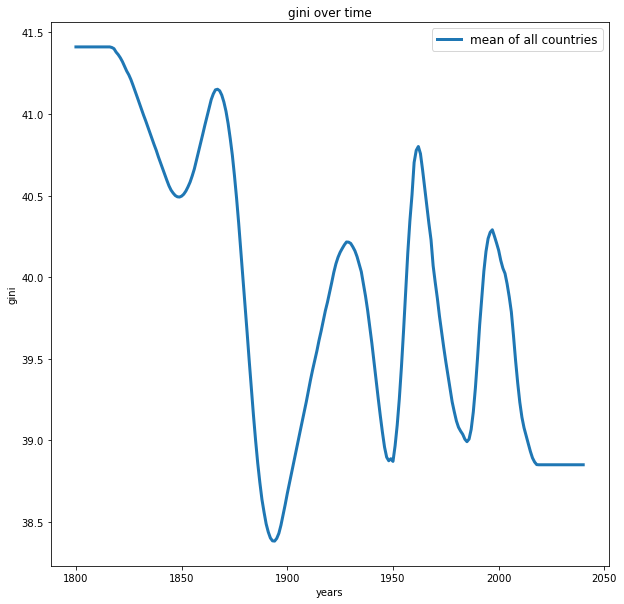

In [11]:
data_check('gini')

#### Summary of Gini Data
- There are 23 duplicates in the dataframe
- All values are decreasing over time, except the min value
- This curve goes up and down, coming in 1800 from absolute maximum (41.41), the curve is decreasing to an absoulte minimum (38.38) in 1894
- From this point on the curve is rising in peaks and lows to 38.85
- At the end the curve does not move and seems to be froozen

In [12]:
# check duplicates
x = d['gini']
#print(x[x.duplicated()].head(), x[x.duplicated()].tail())

The duplicates seem to be countries with no precise information, but one value for the row. But I won't drop them, because I assume that the values are estimations of experts and therefore valid for my kind of project.

## Data Cleaning (Cutting the timescale, alligning datatypes, generating a continental view)

### Summary of Interpretation of raw data chart
- The data is well structured in tables and clean
- The life expectancy Dataframe contains 184 countries and is therefore the minimal subset of countries of all datsets, the population_total dataset on the other side has 195 countries
- There are different time scales, that will be cut off after the year 2015
- The dataframes have different datatypes int64 and float64
- All the curves are rising and seem to have a positive correlation, besides the gini coefficient

### Allign timescales to 1800 to 2015

In [13]:
# cut timescale to 2015
for key, value in d.items():
    d[key] = value.loc[:,'1800':'2015']

### Convert all dataframes to int

In [14]:
#Convert columns to int
for i in d:
    d[i] = d[i].astype(int)
    #print(d[i].info())

The Dataframes have 'int' as datatype and the timescale is alligned. The conversion from 'float' to 'int' means also a loss of information, but for alligning the datasets 'int' is the common denominator.


### Generate continental view

Here is the code to generate a coninental view on the data with continent lists and the countries they contain. The lists were copied from wikipedia (f.e. https://en.wikipedia.org/wiki/List_of_African_countries_by_population, 24.7) into textfiles. The data was also manually adjusted (f.e. notes were removed). The resulting lists are stored in a dictionary.

In [15]:
# generate continent lists 
wiki_txt = glob.glob('*.txt')
wiki_lists = {}
for i in wiki_txt:
    conti = str(i).strip('.txt')
    with open(i) as file:
        wiki_list = []
        for line in file:
            line = line.strip().lower().replace(" ", "_").replace(".", "")
            wiki_list.append(line.strip())
        wiki_lists[conti] = wiki_list

#### Data Cleaning to get the countries allocated to continents according to the wikipedia webpage

In [16]:
# check if all countries from gapminder match to wikilists
g = d['population_total'].iloc[:].index.tolist()

#print(g)
x = 0
i = 0
yesyes = 0
yesyeslsts = []
for i in wiki_lists.values():
    yes = 0
    no = 0
    ja = []
    nein=[]
    for line in g:
        if line in i:
            yes+=1
            yesyes+=1
            ja.append(line)
        else:
            no+=1
            nein.append(line)
    x = len(i)
    yesyeslsts.append(ja)
    #print('Wiki_list_count: ', x,'\n', 'found: ', yes,'\n', 'not found: ', no,'\n')
    print('\n','{} countries of the wikilists are found in the column country with {} countries'.format(yesyes, len(g)))
flat_list = []
for sublist in yesyeslsts:
    for item in sublist:
        flat_list.append(item)
#print('\n','These countries were found: ','\n', sorted(flat_list))


 46 countries of the wikilists are found in the column country with 195 countries

 100 countries of the wikilists are found in the column country with 195 countries

 114 countries of the wikilists are found in the column country with 195 countries

 126 countries of the wikilists are found in the column country with 195 countries

 149 countries of the wikilists are found in the column country with 195 countries

 195 countries of the wikilists are found in the column country with 195 countries


In [17]:
# check equality of lists
set(g) == set(flat_list)

True

### Result Data  cleaning continent list

Kazhachstan, Georgia, Russia and Turkey had to be allocated to continents by my decision, because they belong to Europe and Asia. Russia and Kazhachstan were allocated to Asia, Turkey and Georgia to Europe. The spelling of 'Saint' and 'St.' f.e. had to be alligned manually, to get the lists alligned. There are more countries in the wikipedia lists than on the gapminder webpage.

### Checking the data on continent level

In [18]:
# function to generate continental csv files
def conti_csv(df,c,k):
    x = os.getcwd()
    os.makedirs('continental_view', exist_ok = True)
    os.chdir('continental_view')
    csv_tit = k + '_' + c + '.csv'
    df.to_csv(csv_tit)
    os.chdir(x)

In [19]:
#function that generates data(visualisations, statistics) by filtering the data for every continent (list from wikipedia)
# what about generating different dfs for the continents and save them in a dictionary
def data_check_continent(c,w,k):
    df = d[k]
    df = df[df.iloc[:].index.isin(w)]
    df_mean = df.mean()
    years = df.columns
    years = years.astype(int)
    plot_mean = plt.plot(years,df_mean, label = c, linewidth=3)
    plot_title = k + ' over' +' time'
    plt.title(plot_title)
    plt.xlabel('years')
    plt.ylabel(k)
    plt.legend(fontsize=12, title_fontsize=15)
    plt.rcParams['figure.figsize'] = [10, 10]
    return  c, plot_mean, conti_csv(df,c,k)#, data_stats(df)

#### Total population with continental view

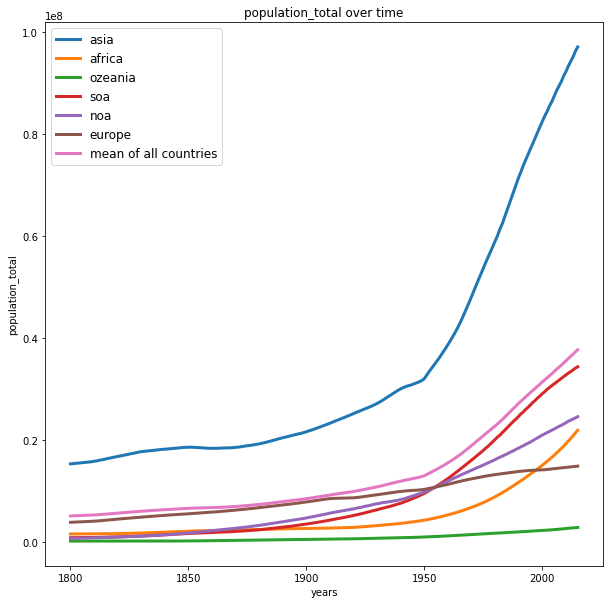

In [20]:
# check the data on a continental view for the population
for key, value in wiki_lists.items():
    data_check_continent(key, value,'population_total')
data_check('population_total')

**Desription of the population chart**

- All mean population curves are rising
- Ozeanias curve is the only curve that has its min value in 1803 and not in 1800
- From the 1950s all curves seem to grow faster, besides Europes and Ozeanias Curve
- Only Asias curve is above the mean, all other are  under the mean
- Ozeania has the smallest population
- Below the mean Southamericas and Africas population are growing faster

#### Life expectancy in years with continental view

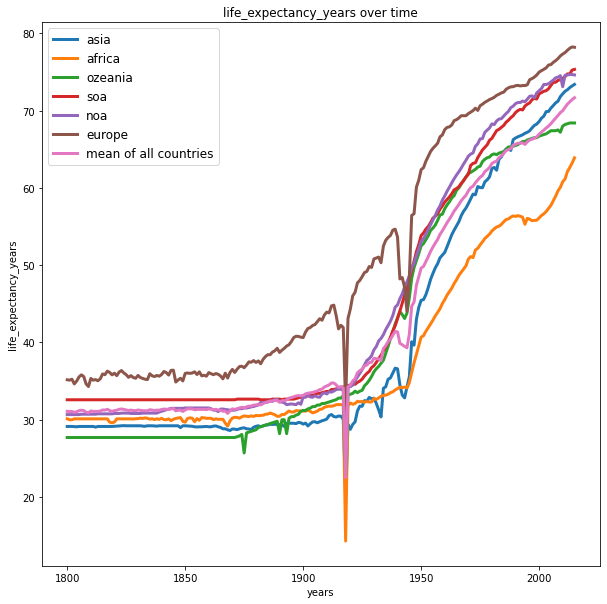

In [21]:
for key, value in wiki_lists.items():
    data_check_continent(key, value,'life_expectancy_years')
data_check('life_expectancy_years')

**Description of the life expectancy chart**

- All mean population curves are rising, but there are significant lows in the year 1918 (min value for all curves) worldwide and in the years before 1950 (not all curves); my guess is that these lows were caused by war or pandemic
- Worldwide all curves seem to grow faster after 1950, but the life expectancy in Africa does not grow as fast as the other curves. In recent years the growth of the curves seems to slow down.
- Europes curve represents the highest values over time (besides the significant lows), Afrikas the lowest since the 50s of the last century
- Europe, Northamerica and Ozeania do not have their max values in the last year of the table
- In the first years the values only in Europe and Africa are moving

#### Income data with continental view

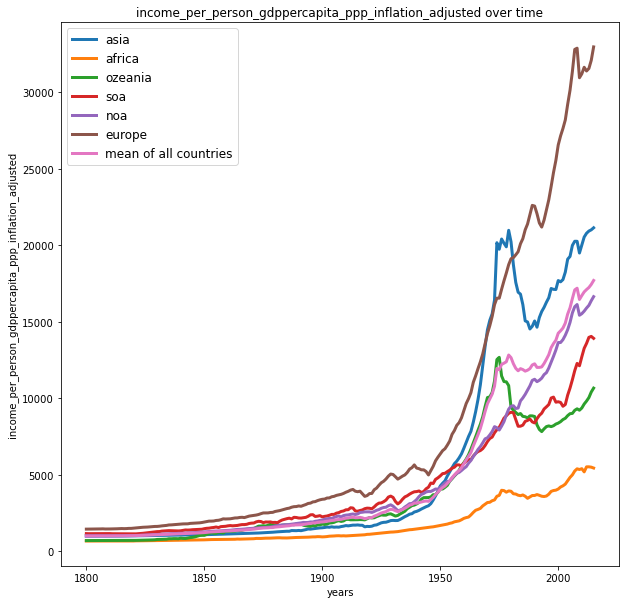

In [22]:
for key, value in wiki_lists.items():
    data_check_continent(key, value,'income_per_person_gdppercapita_ppp_inflation_adjusted')
data_check('income_per_person_gdppercapita_ppp_inflation_adjusted')

**Description of the income chart**

- All mean income curves are rising, but there are significant lows in the years between 1950 and 2000 worldwide 
- Worldwide all curves seem to grow faster after 1950, especially the curve of Europe; after the low the growth is the fastest again
- Europes curve represents the highest values most of the time, for some years between 1950 and 2000 Asia has the highest values.
- The curve of Asia ends with the highest value after Europe, followed by the Average, Northamerica, Southamerica and Ozeania
- Africas curve represents the lowest values and has it's max value not in the last year, but 2013
- Ozeanias max value is in the year 1975, Southamericas in the year 2014

#### Gini Data with continental view

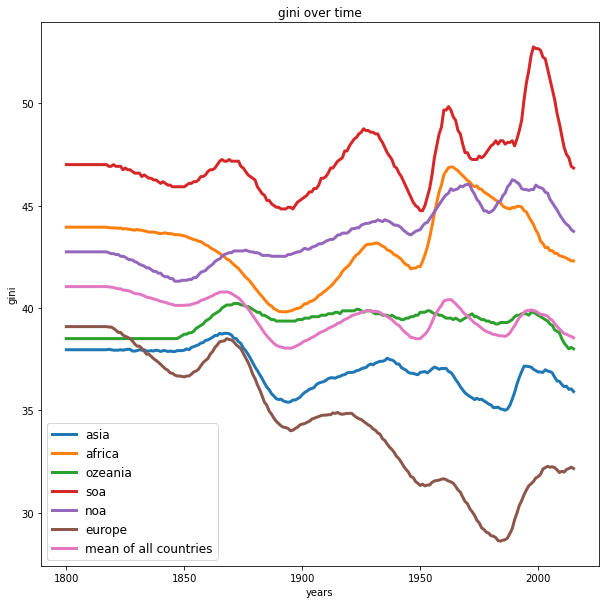

In [23]:
for key, value in wiki_lists.items():
    data_check_continent(key, value,'gini')
data_check('gini')

**Description of the gini chart**

- There are peaks and lows in all curves. There are rising as well as falling curves.
- Southamericas curve represents the highest values over the time, Europes curve has the lowest values since 1850
- Asias curve starts with the lowest values, but some years before 1850 the gini coefficient of europe gets lower
- The curve of North America is in the middle and meets the mean curve severeal times. 
- The curves of Africa and Ozeania are always between the asian and the mean curve.

### Summary of continental view
- All curves are rising, besides the gini coefficient
- To examine the connection of the indicators, I'm going to visualize three of four indicators in a scatterplot and calculate the correlation of the worldwide and continent data.

### Prepare data and store dataframes in dictionary

In [24]:
# change directory to 'continental view'
os.chdir('continental_view')

In [25]:
#assign variable and get an overview over the csv files
all_files = glob.glob('*.csv')
#all_files

In [26]:
# loading the continental files into a dictionary with a column continent
dict_cont = {}
for key in wiki_lists.keys():
    for i in all_files:
        i_ = i.replace('.csv', '')
        if i_.endswith(key):
            valname = key + '_' + i_[:3]
            dict_cont[valname] = pd.read_csv(i, index_col=0)
            x = dict_cont[valname]
            x['continent'] = key

In [27]:
#dict_cont.keys()

In [28]:
# List of indicators
indic_dict = {'lif':'life_expectancy_years', 'inc':'income_per_person_gdppercapita_ppp_inflation_adjusted', 'gin':'gini', 'pop':'population_total'}
#print(indic_dict.keys())

In [29]:
# concatination of files
for i in indic_dict.keys():
    df_i = pd.DataFrame()
    for key, value in dict_cont.items():
        if key.endswith(i):
            df_name = i
            df_i = df_i.append(value)
            d[i] = df_i
#print (d.keys())

In [30]:
country_index = d['life_expectancy_years'].index.tolist()
for key, value in d.items():
    value = value[value.iloc[:].index.isin(country_index)]
    #print(value.info())

# Exploratory Data Analysis
After alligning the data and storing it in dictionaries, I want the examine the interrelation of these key indicators by plotting them into one scatterplott visualizing three of these indicators. After that I'm going to calculate the correlation for the global average and for the average of the continents over time.

## Life expectancy and population
### Average life expectancy and population worldwide

In the first chart I want to bring the information for life expectancy and population togehter and generate a chart with the life expectancy on the x-axis and the population on the y-axis. The size of the plotted bubbles is defined by the income.

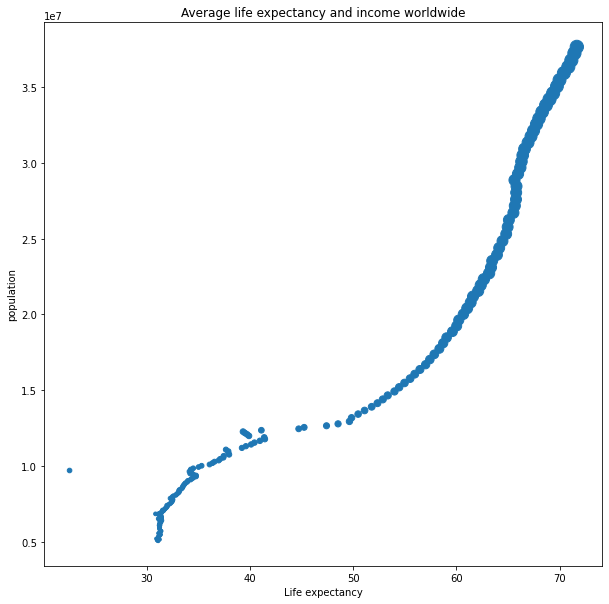

In [31]:
x = d['lif'].loc[:,:'2015'].mean()
y = d['pop'].loc[:,:'2015'].mean()
z = d['inc'].loc[:,:'2015'].mean()
sen_mean = 'The mean of the lifeexpectancy is {}. The mean of the population is {}. The mean of the income is {}.\n'.format(x.mean(),y.mean(), z.mean())
sen_min = 'The min value of the mean life expectancy is {} in the year {} with a minimum of mean worldwide population of {} in the year {} and a mean minimum income of {} in the year {}.\n'.format( x.min(), x.idxmin(), y.min(), y.idxmin(), z.min(), z.idxmin())
sen_max = 'The max value of the mean life expectancy is {} in the year {} with a maximum of mean worldwide population of {} in the year {} and a mean maximum income of {} in the year {}.\n'.format( x.max(), x.idxmax(), y.max(), y.idxmax(), z.max(), z.idxmax())
#print(sen_mean, sen_min, sen_max)
plt.title('Average life expectancy and income worldwide')
plt.xlabel('Life expectancy')
plt.ylabel('population')
plt.scatter(x,y,z/100)
plt.show()

**Description of chart**

- The chart shows a rising curve with bigger getting bubbles.
- All three indicators are rising with a significant low of the lifeexpectancy 1918.

### Average life expectancy and population continental view

Now I'm going to generate the same chart for the continents

No handles with labels found to put in legend.


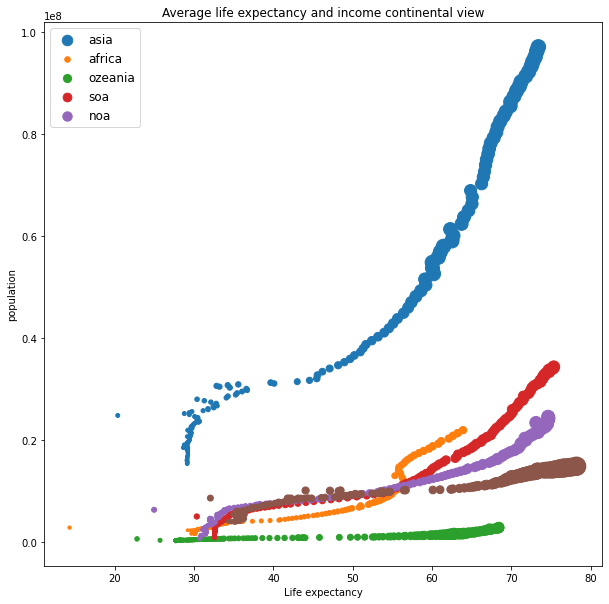

In [32]:
for key in wiki_lists:
    x = dict_cont[key + '_lif'].loc[:,'1800':'2015'].mean()
    y = dict_cont[key + '_pop'].loc[:,'1800':'2015'].mean()
    z = dict_cont[key + '_inc'].loc[:,'1800':'2015'].mean()
    plt.title('Average life expectancy and income continental view')
    plt.legend(fontsize=12, title_fontsize=15)
    plt.xlabel('Life expectancy')
    plt.ylabel('population')
    plt.scatter(x,y,z/100, label = key)
    sen_mean = 'The mean of the lifeexpectancy is {}. The mean of the population is {}. The mean of the income is {}.\n'.format(x.mean(),y.mean(), z.mean())
    sen_min = 'The min value of the mean life expectancy is {} in the year {} with a minimum of mean population of {} in the year {} and a mean minimum income of {} in the year {}.\n'.format( x.min(), x.idxmin(), y.min(), y.idxmin(), z.min(), z.idxmin())
    sen_max = 'The max value of the mean life expectancy is {} in the year {} with a maximum of mean population of {} in the year {} and a mean maximum income of {} in the year {}.\n'.format( x.max(), x.idxmax(), y.max(), y.idxmax(), z.max(), z.idxmax())
    #print(key,':\n', sen_mean, sen_min, sen_max)
plt.show()

**Summary**

- Unfortunately the legend does not show 'noa' for north america (there is also the warning 'No handles with labels found to put in legend.')
- Africas and Ozeanias curve are not reaching 70 years
- The growth of Asias population does not go hand in hand with the highest life expectancy or income
- Regarding the population Ozeania is the lower limit and asia the upper

### Correlation of population and life expectancy over time worldwide

In the next chart we will see the calculated correlation of life expectancy and population worldwide. At the first look I would guess that there should be a strong correlation.

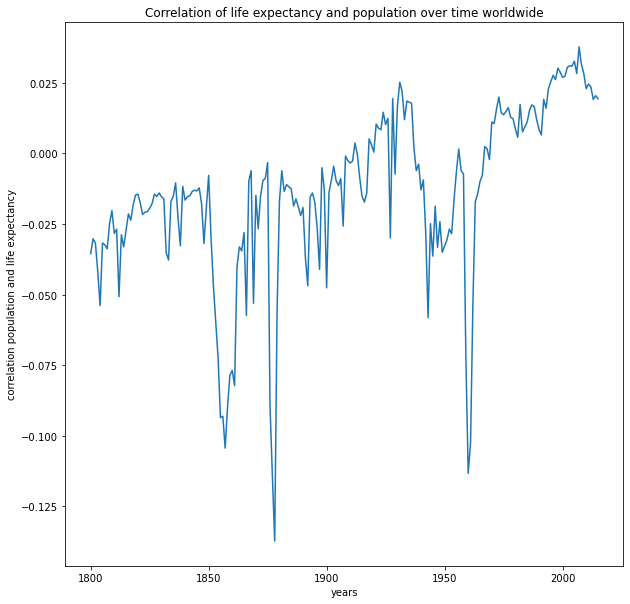

In [33]:
#correlation stats and plot
years = np.arange(1800, 2016)
y = d['lif'].corrwith(d['pop'])
plt.xlabel('years')
plt.ylabel('correlation population and life expectancy')
plt.plot(years, y)
plt.title('Correlation of life expectancy and population over time worldwide')
sent = 'The mean of the correlation is: {}. The max value of the correlation is: {} in the year {}. The min value of the correlation is {} in the year {}.'.format(y.mean(),y.max(), y.idxmax(), y.min(), y.idxmin()) 
#print(sent)

**Summary**

- The curve starts with a very smal negative correlation value.
- The curve dows not meet my expectation of a strong correlation

### Correlation of population and life expectancy over time per continent

This is the continental view on the correlation  of population and life expectancy

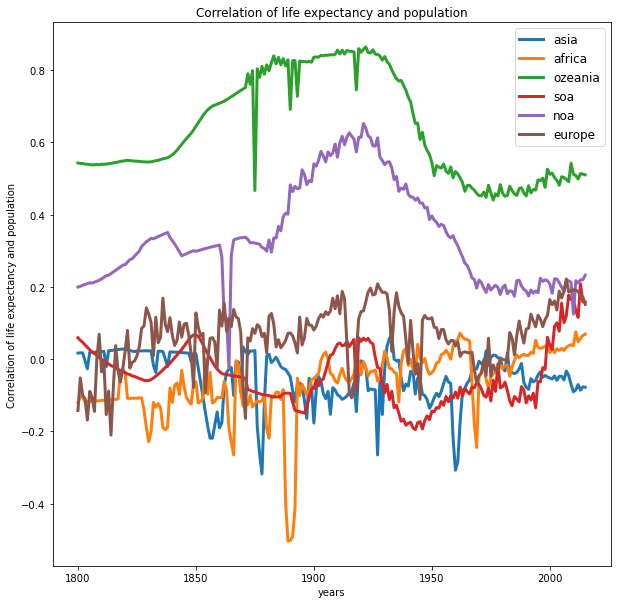

In [34]:
#correlation stats and plot for continents
for key in wiki_lists:
    df1 = dict_cont[key + '_pop'].loc[:,'1800':'2015']
    df2 = dict_cont[key + '_lif'].loc[:,'1800':'2015']
    y = df1.corrwith(df2)
    plt.plot(years, y, label=key, linewidth = 3)
    plt.legend()
    plt.title('Correlation of life expectancy and population')
    plt.xlabel('years')
    plt.ylabel('Correlation of life expectancy and population')
    plt.legend(fontsize=12, title_fontsize=15)
    plt.rcParams['figure.figsize'] = [10, 10]
    mean_1800 = y[0]
    mean_2015 = y[-1]
    mean_diff = mean_2015 - mean_1800
    sent_mean = '{}:\n The correlation starts with {} in 1800 and ends with {} in 2015. The difference is {}.\n The mean of the correlation is: {}. The max value of the correlation is: {} in the year {}. The min value of the correlation is {} in the year {}. The difference is {}.\n'.format(key,mean_1800, mean_2015, mean_diff, y.mean(), y.max(), y.idxmax(), y.min(), y.idxmin(), y.max()-y.min()) 
    #print(sent_mean)

**Summary**

- The curve of Ozeania and Northamerica show positive correlations. 
- Ozeania has a the strongest correlation in 1922 with 0.86
- All other correlation curves are more or less in range of 0.2 to -0.2, a quite weak correlation coefficient

## Life expectancy and Income
### Average life expectancy and income worldwide

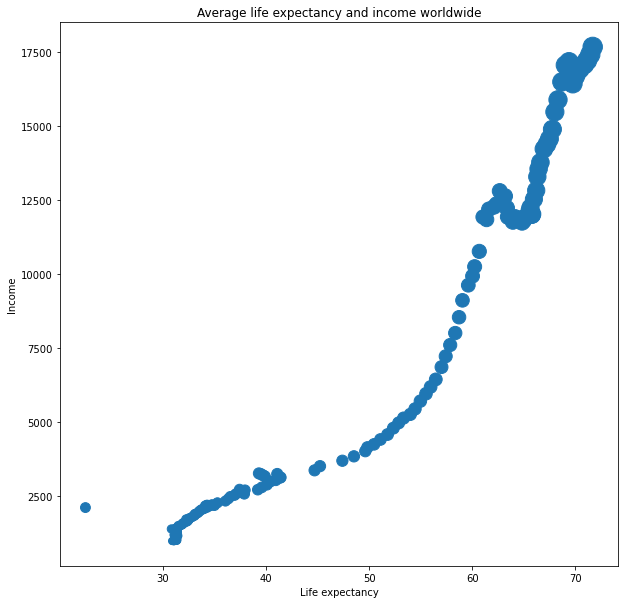

In [35]:
#for continent in wiki_lists:
x = d['lif'].loc[:,:'2015'].mean()
y = d['inc'].loc[:,:'2015'].mean()
z = d['pop'].loc[:,:'2015'].mean()
plt.title('Average life expectancy and income worldwide')
plt.xlabel('Life expectancy')
plt.ylabel('Income')
plt.scatter(x,y,z/100000)
plt.show()

**Summary**

- In general the curve is rising and the bubbles are getting bigger
- After the life expectancy of 60 there are two intermediate lows 

### Average life expectancy and income continental view

No handles with labels found to put in legend.


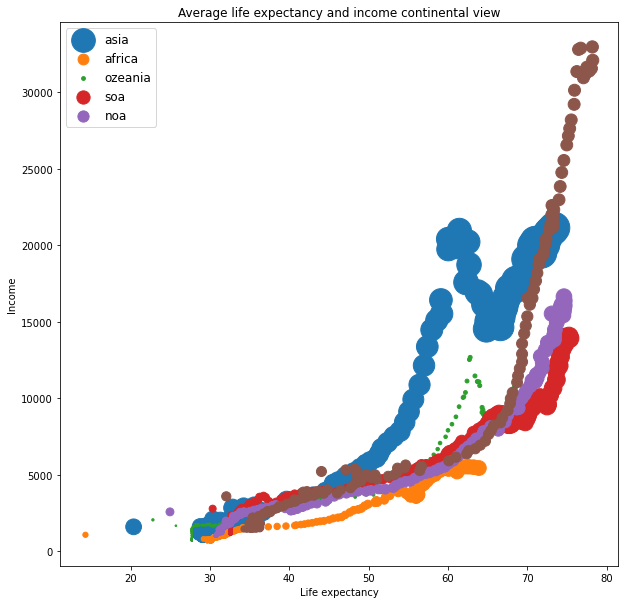

In [36]:
for key in wiki_lists:
    x = dict_cont[key + '_lif'].loc[:,'1800':'2015'].mean()
    y = dict_cont[key + '_inc'].loc[:,'1800':'2015'].mean()
    z = dict_cont[key + '_pop'].loc[:,'1800':'2015'].mean()
    plt.title('Average life expectancy and income continental view')
    plt.legend(fontsize=12, title_fontsize=15)
    plt.xlabel('Life expectancy')
    plt.ylabel('Income')
    plt.scatter(x,y,z/100000, label = key)
plt.show()

**Summary**

- Unfortunately the legend does not show 'noa' for north america (there is also the warning 'No handles with labels found to put in legend.')
- Up to income of 20.000 and a life expectancy of 60 years, Asia is the upper limit and Afrikas curve the lower limit
- Africas curve stops at a life expectancy between 60 and 70 and a income above 5000.
- Europes curve exceeds the other curves regarding the income and a little bit in life exectancy

### Correlation of income and life expectancy over time worldwide

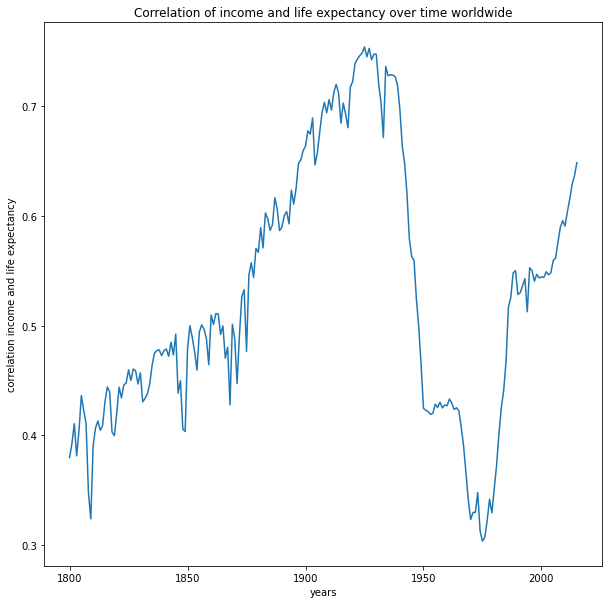

In [37]:
#correlation stats and plot
years = np.arange(1800, 2016)
y = d['lif'].corrwith(d['inc'])
plt.xlabel('years')
plt.ylabel('correlation income and life expectancy')
plt.plot(years, y)
plt.title('Correlation of income and life expectancy over time worldwide')
sent = 'The mean of the correlation is: {}. The max value of the correlation is: {} in the year {}. The min value of the correlation is {} in the year {}.'.format(y.mean(),y.max(), y.idxmax(), y.min(), y.idxmin()) 
#print(sent)

**Summary**

- The max value of the correlation is in 1925 with 0.75. The curve is growing to this value from 1800 in lows and peaks
- After that the curve falls to a value of 0.3 in the year 1975. After that the curve began to rise again to a val ue of 0.6 in 2015
- This correlation is stronger than the correlation between life expectancy and population.

### Correlation of income and life expectancy over time per continent

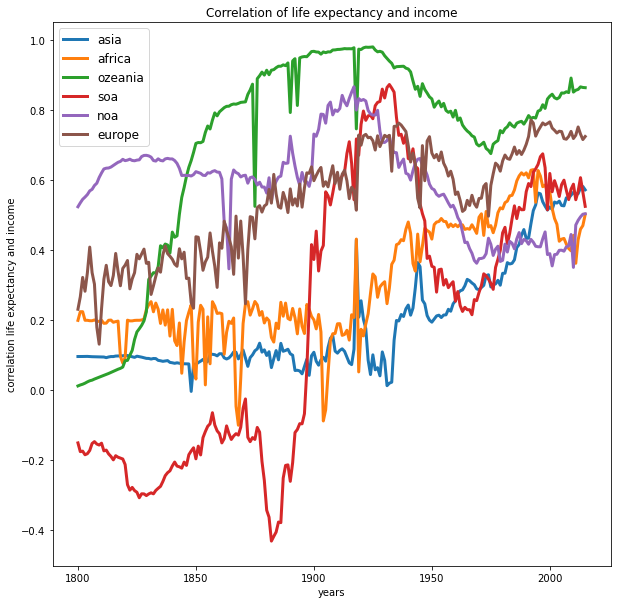

In [38]:
#correlation stats and plot for continents
for key in wiki_lists:
    df1 = dict_cont[key + '_inc'].loc[:,'1800':'2015']
    df2 = dict_cont[key + '_lif'].loc[:,'1800':'2015']
    y = df1.corrwith(df2)
    plt.plot(years, y, label=key, linewidth = 3)
    plt.legend()
    plt.title('Correlation of life expectancy and income')
    plt.xlabel('years')
    plt.ylabel('correlation life expectancy and income')
    plt.legend(fontsize=12, title_fontsize=15)
    plt.rcParams['figure.figsize'] = [10, 10]
    mean_1800 = y[0]
    mean_2015 = y[-1]
    mean_diff = mean_2015 - mean_1800
    sent = '{}:\n The correlation starts with {} in 1800 and ends with {} in 2015. The difference is {}.\n The mean of the correlation is: {}. The max value of the correlation is: {} in the year {}. The min value of the correlation is {} in the year {}. The difference is {}.\n'.format(key,mean_1800, mean_2015, mean_diff, y.mean(), y.max(), y.idxmax(), y.min(), y.idxmin(), y.max()-y.min()) 
    #print(sent)

**Summary**

- Not all curves are rising. Northamericas correlation coefficient is lower at the end than at the beginning. In the first 50 years Nothamerica had to highest values ending with Africa at a value of something about 0.5
- Ozeania has a strong correlation at the end of 0.86, strting from 0.01 in 1800
- Ozeania is followed by Europe's curve since 1950, ending with 0.72. 
- After Asia and Southamerica are following with 0.57 and 0.52
- The correlation coefficient is the first that shows a connection (especially Europe and Ozeania).

## Life expectancy and Gini Coefficient
### Average Life expectancy and Gini Coefficient worldwide

No handles with labels found to put in legend.


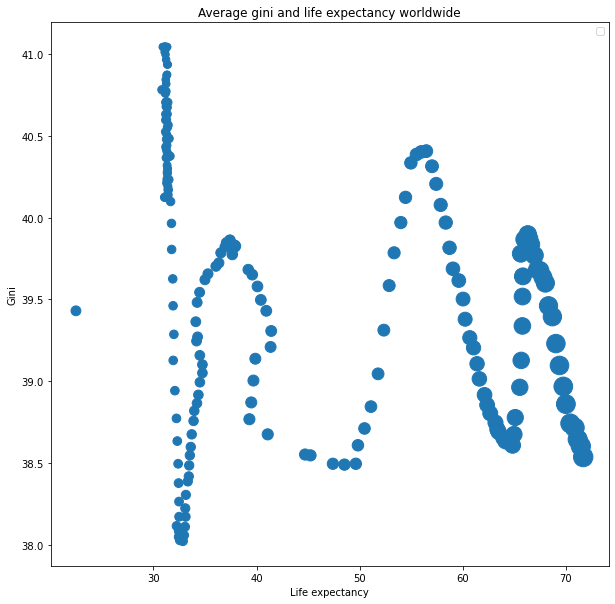

In [39]:
x = d['lif'].loc[:,:'2015'].mean()
y = d['gin'].loc[:,:'2015'].mean()
z = d['pop'].loc[:,:'2015'].mean()
sent_gin = '- The mean of the gini coefficient is: {}. The max value of gini coeffcient is: {} in the year {}. The min value of the gini coefficient is {} in the year {}.\n'.format(y.mean(),y.max(), y.idxmax(), y.min(), y.idxmin()) 
sent_inc = '- The mean of the life expectancy is: {}. The max value of the life expectancy is: {} in the year {}. The min value of the income is {} in the year {}.\n'.format(x.mean(),x.max(), x.idxmax(), x.min(), x.idxmin()) 
sent_pop = '- The mean of the poulation is: {}. The max value of the population is: {} in the year {}. The min value of the population is {} in the year {}.\n'.format(z.mean(),z.max(), z.idxmax(), z.min(), z.idxmin()) 
#print(sent_gin, sent_inc, sent_pop)
plt.title('Average gini and life expectancy worldwide')
plt.legend()
plt.xlabel('Life expectancy')
plt.ylabel('Gini')
plt.scatter(x,y,z/100000)
plt.show()

**Summary**

- The chart starts with a gini value about 39.5 and a very low life expectancy
- The next bubble is the max value and the line of bubbles falls to the min value
- In three ups and downs it reaches the highest life expectancy value with a gini score about 38.5
- The bubbles are getting bigger with a rising life expectancy, what indicates a also rising population

### Average Life expectancy and Income per continent

No handles with labels found to put in legend.


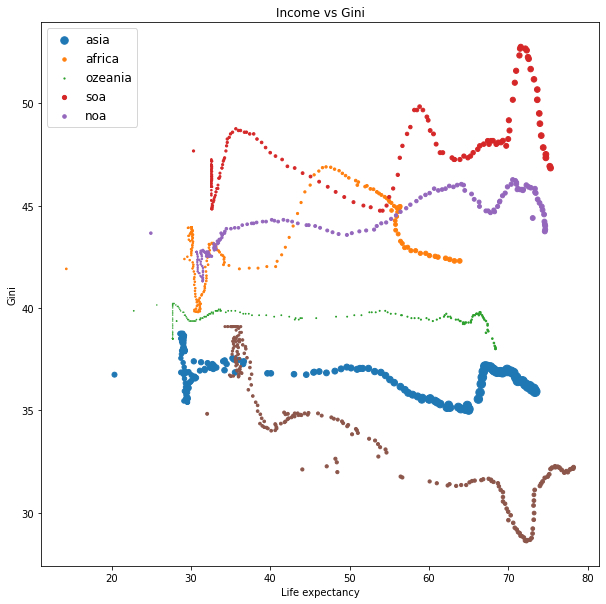

In [40]:
for key in wiki_lists:
    x = dict_cont[key + '_lif'].loc[:,'1800':'2015'].mean()
    y = dict_cont[key + '_gin'].loc[:,'1800':'2015'].mean()
    z = dict_cont[key + '_pop'].loc[:,'1800':'2015'].mean()
    plt.title('Income vs Gini')
    plt.legend(fontsize=12, title_fontsize=15)
    plt.xlabel('Life expectancy')
    plt.ylabel('Gini')
    plt.scatter(x,y,z/1000000, label = key)

**Summary**

- All bubble curves end at heir life expectancy, independent of their Gini
- The curves do not cross eac other so often

### Correlation gini and life expectancy worldwide over time

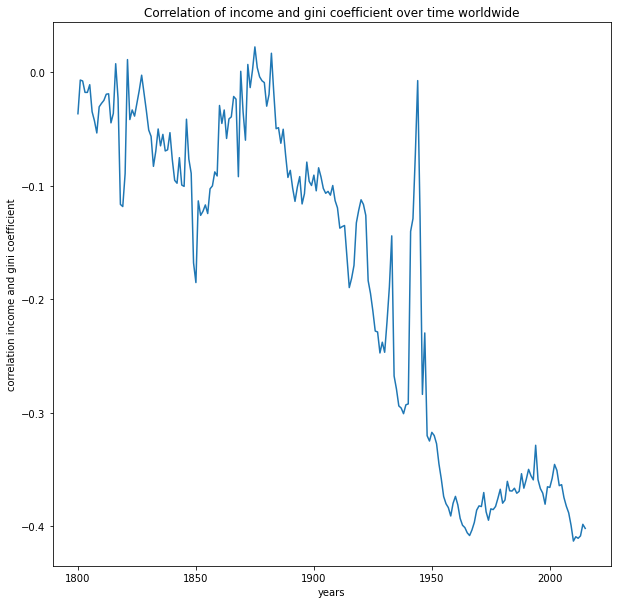

In [41]:
#corelation stats and plot
years = np.arange(1800, 2016)
y = d['lif'].corrwith(d['gin'])
plt.plot(years, y)
plt.xlabel('years')
plt.ylabel('correlation income and gini coefficient')
plt.title('Correlation of income and gini coefficient over time worldwide')
sent = '- The correlation starts 1800 with {} and ends 2015 with {}.\n- The mean of the correlation is: {}.\n- The max value of the correlation is: {} in the year {}. The min value of the correlation is {} in the year {}.'.format(y[0],y[-1],y.mean(),y.max(), y.idxmax(), y.min(), y.idxmin()) 
#print(sent)

**Summary**

- The worldwide correlation over years is falling from a value about 0 to -0.4

### Correlation gini and life expectancy per continent over time

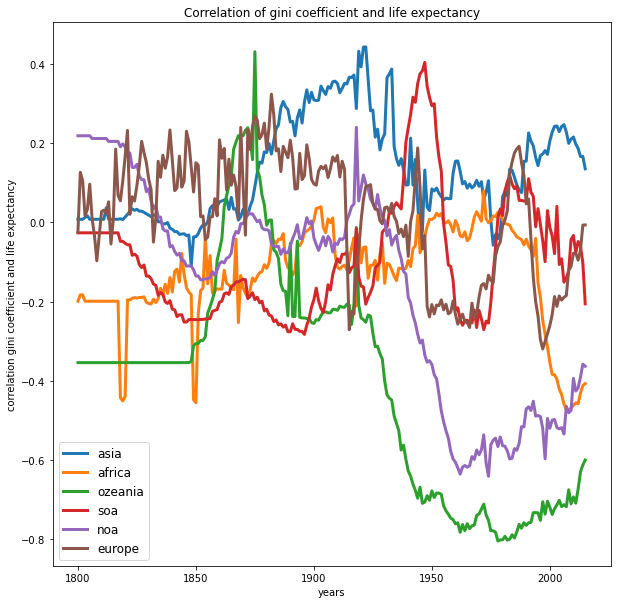

In [42]:
for key in wiki_lists:
    df1 = dict_cont[key + '_lif'].loc[:,'1800':'2015']
    df2 = dict_cont[key + '_gin'].loc[:,'1800':'2015']
    y = df1.corrwith(df2)
    plt.plot(years, y, label=key, linewidth = 3)
    plt.legend()
    plt.title('Correlation of gini coefficient and life expectancy')
    plt.xlabel('years')
    plt.ylabel('correlation gini coefficient and life expectancy')
    plt.legend(fontsize=12, title_fontsize=15)
    plt.rcParams['figure.figsize'] = [10, 10]
    mean_1800 = y[0]
    mean_2015 = y[-1]
    mean_diff = mean_2015 - mean_1800
    sent = '{}:\n The correlation starts with {} in 1800 and ends with {} in 2015. The difference is {}.\n The mean of the correlation is: {}. The max value of the correlation is: {} in the year {}. The min value of the correlation is {} in the year {}. The difference is {}.\n'.format(key,mean_1800, mean_2015, mean_diff, y.mean(), y.max(), y.idxmax(), y.min(), y.idxmin(), y.max()-y.min()) 
    #print(sent)

**Summary**

- Africa, Ozeania and Northamerica show higher negative correlation coefficients in recent years
- The other continents show lower correlation values

In [43]:
# go back to working directory
os.chdir('/Users/kruno/Desktop/UDDAND2')

### Correlation matrix of continental indicators

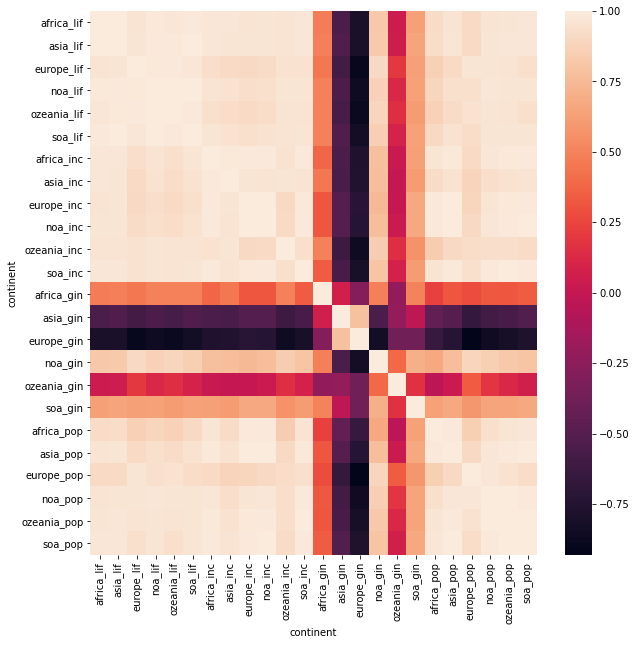

In [44]:
# generate a df with all continental means, rename index of each table with key from continents and append==> correlation matrix of continental indicators
df = pd.DataFrame()
for i in indic_dict.keys():
    j = d[i].groupby('continent').mean()
    j.rename(index=lambda j: j + '_' + i, inplace=True)
    df = df.append(j)
    df.to_csv('df_all_conti_mean.csv')
df = df.transpose()
sns.heatmap(df.corr())
plt.show()
#print(df.corr())

### Correlation matrix of continental indicator patterns along the years

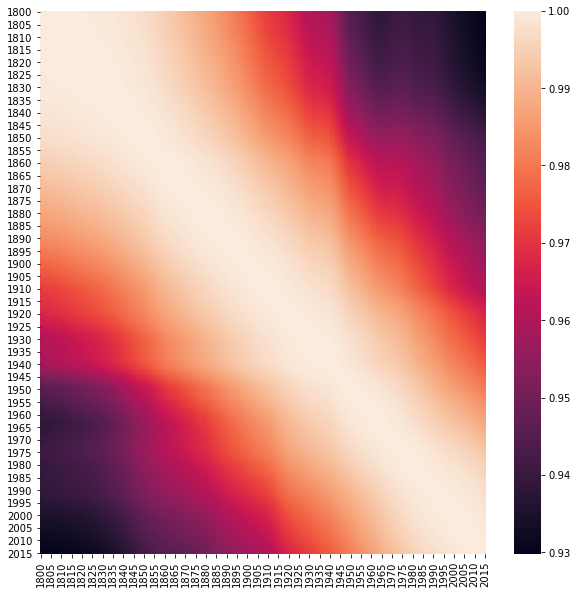

In [45]:
# generate a df with all continental means, rename index of each table with key from continents and append==> correlation matrix for years
df = pd.DataFrame()
for i in indic_dict.keys():
    j = d[i].groupby('continent').mean()
    j.rename(index=lambda j: j + '_' + i, inplace=True)
    df = df.append(j)
    df.to_csv('df_all_conti_mean.csv')
sns.heatmap(df.corr())
plt.show()
#print(df.corr())

**Summary Correlation matrix**

- The correlation matrix shows high correlations between the indicators, besides the gini coefficient
- The southamerican and the northamerican Gini Coefficient have a higher positive correlation
- The european and asian Gini Coefficient are negative.
- The african and ozeanian are in between with a red shadowed colour
- My interpretation of the heatmap correlating the years is that times are changing, but not so much because the range is between 0.93 to 1.

# Conclusions

- The statistics show how population, income and the life expectancy are rising, the gini coefficient is has other curves
- The statistics of the raw data did not surprise me very much, because these are publicly discussed key indicators most people are familiar with
- Calculating the correlations showed me a remarkable (but not strong) correlation beween income and life expectancy, but not a correlation between f.e. the population and the life expectancy over time, what I would have expected.
- The correlation seems to be stronger for special regions. This is f.e. the case for the life expectancy and income correlation for Ozeania.
- Correlating the continental average values with each other shows that the there is a similar development (high correlation) over the continents for the life expectancy, population growth and income development.
- Being new to the profession of data analyzing, there are things to be improved and I wonder about:
    - the value of the correlation heatmap over years. From my point of view it shows patterns of numbers of the indicators and how they relate to each other in yearly comparison
    - the value of the scatterplots, visualizing three indicators in one chart
    - Another thing that is technically open is to fix the bug of the plt.legend, f.e. in output[37]
    - I also wonder if I did too much playing around and if there is a straighter process to get the result

# Used Ressources

- Stackoverflow: https://stackoverflow.com
- Pandas Documentation: https://pandas.pydata.org/docs/
- Python documentation: https://docs.python.org/3/
- Matplotlib Documentation:https://matplotlib.org/contents.html